# Laboratorio 4 - Regresión

- Carlos Silva - 201821974
- Sara Calle - 201820801
- Juliana Velasco - 201822088

## Importación de librerías

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

#Modulos propios para modificar los datos
from DataPrep import *


Bad key text.latex.preview in file C:\Users\cesl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\cesl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\cesl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

## 1. Entendimiento de los datos

In [2]:
#Cargar datos a un df
df_clinica=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8', index_col=0)

In [3]:
#Datos (Cantidad, Columnas)
df_clinica.shape

(2644, 19)

In [4]:
#Ver una porcion de los datos
df_clinica.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#Revisar las características de los datos: completitud y tipo de dato
df_clinica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2644 non-null   float64
 1   Adult Mortality                  2644 non-null   float64
 2   infant deaths                    2644 non-null   int64  
 3   Alcohol                          2644 non-null   float64
 4   percentage expenditure           2644 non-null   float64
 5   Hepatitis B                      2644 non-null   float64
 6   Measles                          2644 non-null   int64  
 7   BMI                              2644 non-null   float64
 8   under-five deaths                2644 non-null   int64  
 9   Polio                            2644 non-null   float64
 10  Total expenditure                2644 non-null   float64
 11  Diphtheria                       2644 non-null   float64
 12  HIV/AIDS            

In [6]:
#Resumen de los estadisticos de las variables numéricas
df_clinica.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
#Contar datos vacíos
df_clinica.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## 2. Selección de variables

Buscamos cuales de las columnas tienen una *relacion* con Life expectancy usando diagramas de dispersión.

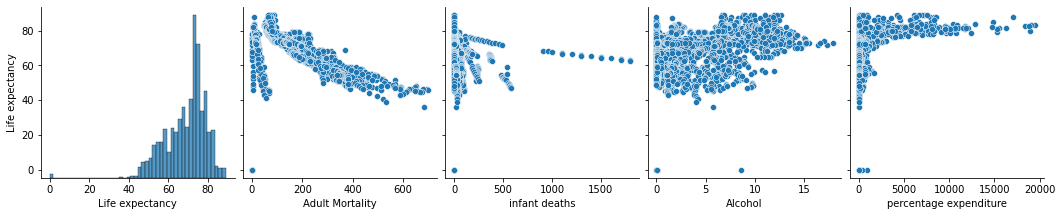

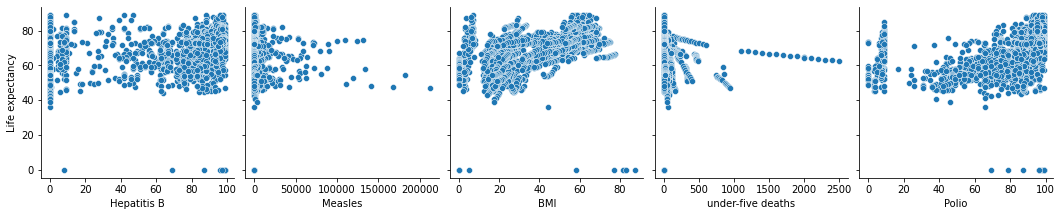

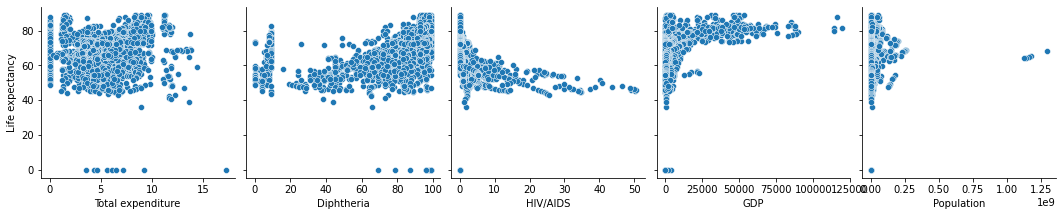

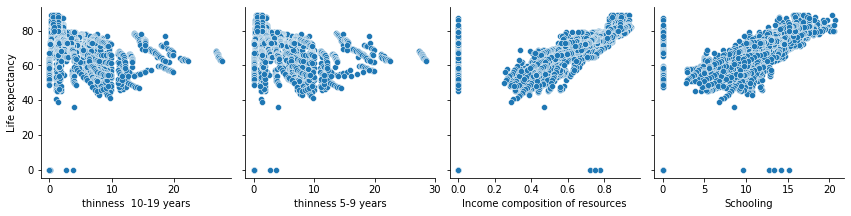

In [8]:
sns.pairplot(df_clinica, height=3, y_vars = 'Life expectancy', x_vars = df_clinica.columns[0:5], kind='scatter')
sns.pairplot(df_clinica, height=3, y_vars = 'Life expectancy', x_vars = df_clinica.columns[5:10], kind='scatter')
sns.pairplot(df_clinica, height=3, y_vars = 'Life expectancy', x_vars = df_clinica.columns[10:15], kind='scatter')
sns.pairplot(df_clinica, height=3, y_vars = 'Life expectancy', x_vars = df_clinica.columns[15:], kind='scatter')

Buscamos columnas con *relación* ahora utilizando matriz de colinealidad.

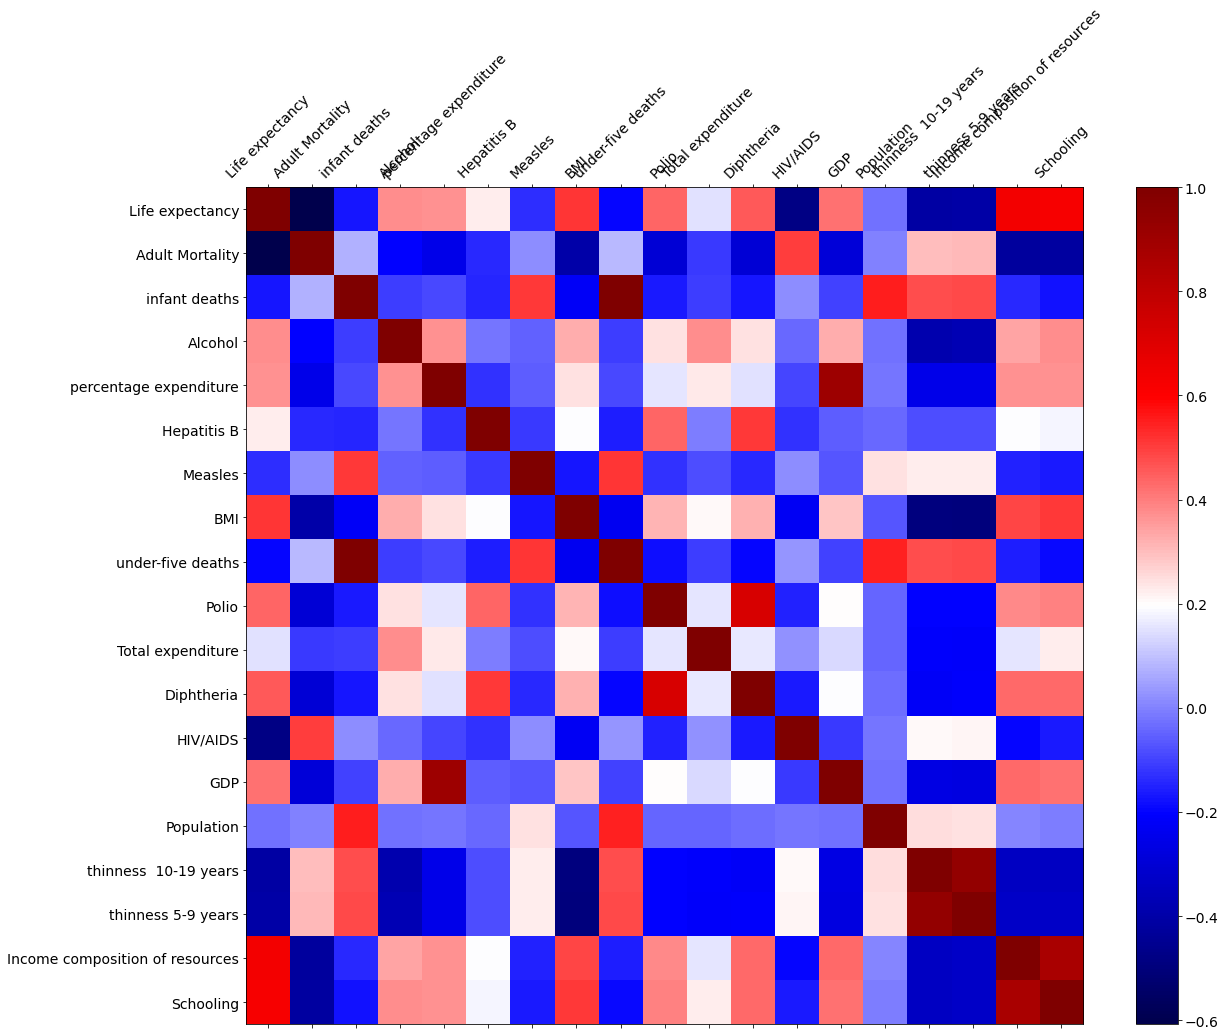

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_clinica.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_clinica.select_dtypes(['number']).shape[1]), df_clinica.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_clinica.select_dtypes(['number']).shape[1]), df_clinica.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

A partir de las gráficas anteriores, encontramos que algunos buenos candidatos son:
* Adult Mortality
* Income composition of resources
* BMI
* HIV/AIDS
* GDP

A partir de la gráfica, se mantienen las variables elegidas.

## 3. Preparación de datos

### Estudiar posibles datos atípicos

Se arreglarán los dominios de las variables que presentan atípicos según su descripción.

C:\Users\cesl\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


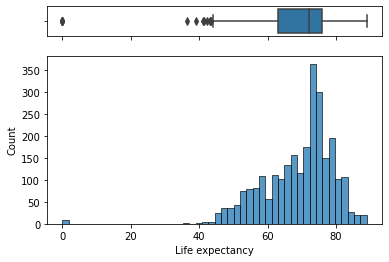

In [10]:
#Gráficar datos Life expectancy
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_clinica["Life expectancy"], ax=ax_box)
sns.histplot(data=df_clinica, x="Life expectancy", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

C:\Users\cesl\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


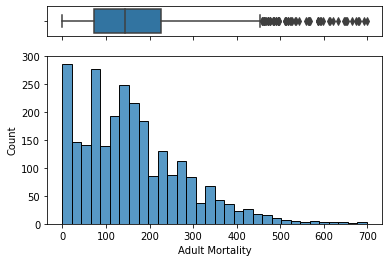

In [11]:
#Gráficar datos Adult Mortality
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_clinica["Adult Mortality"], ax=ax_box)
sns.histplot(data=df_clinica, x="Adult Mortality", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

C:\Users\cesl\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


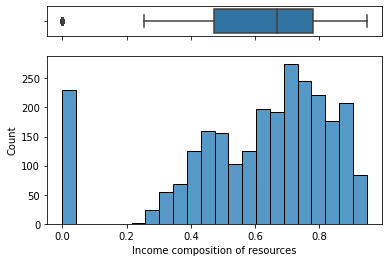

In [12]:
#Gráficar datos Income composition of resources
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_clinica["Income composition of resources"], ax=ax_box)
sns.histplot(data=df_clinica, x="Income composition of resources", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

C:\Users\cesl\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


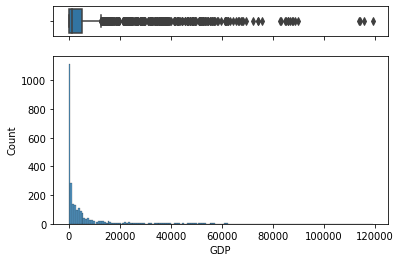

In [13]:
#Gráficar datos GDP
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_clinica["GDP"], ax=ax_box)
sns.histplot(data=df_clinica, x="GDP", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

C:\Users\cesl\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


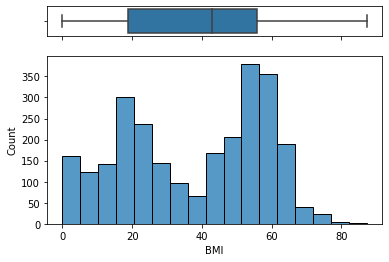

In [14]:
#Gráficar datos BMI
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_clinica["BMI"], ax=ax_box)
sns.histplot(data=df_clinica, x="BMI", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

In [15]:
#Resumen de los estadisticos de las variables numéricas después de manejo de atípicos
df_clinica.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 4. Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *Life expectancy*.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores.

In [16]:
#Numero de vacios
df_clinica.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [17]:
df_clinica=df_clinica.dropna()

In [18]:
df_clinica.shape

(2644, 19)

In [19]:
#Columnas seleccionadas para realizar el modelo
selected_cols =['Adult Mortality','Income composition of resources','BMI','HIV/AIDS', 'GDP']

#Copiar df
df_model=df_clinica.copy()

In [20]:
# Crear un preprocesador para los datos atipicos
#BMI outliers
out_BMI = FunctionTransformer(BMIOutliers, validate = False)

#Adult Mortality outliers
out_am = FunctionTransformer(atipicosAdult, validate = False)

#Income Composition outliers
out_ic = FunctionTransformer(IncomeCompOutliers, validate = False)

#HIV composition outliers
out_hiv = FunctionTransformer(atipicosHIV, validate = False)

#GDP composition outliers
out_gdp = FunctionTransformer(GDPOutliers, validate = False)

t = [
    ('BMI_Tr', out_BMI, ['BMI']),
    ('AM_Tr', out_am, ['Adult Mortality']),
    ('IC_Tr', out_ic, ['Income composition of resources']),
    ('HIV_Tr', out_hiv, ['HIV/AIDS']),
    ('GDP_Tr', out_gdp, ['GDP']),
    ("selector", 'drop', selected_cols)
]
data_preprocessor = ColumnTransformer(transformers=t,  remainder='drop')

In [21]:
#Preprocesamiento
#Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
pre = [('data_preprocessing', data_preprocessor),
      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('power', PowerTransformer())]

In [22]:
#Modelo
model = [('model', LinearRegression())]

In [23]:
#Declara el pipeline
pipeline = Pipeline(pre+model)

In [24]:
#Extraemos las variables explicativas y objetivo para entrenar
X = df_model.drop('Life expectancy', axis = 1)
y = df_model['Life expectancy']
pipeline = pipeline.fit(X,y)

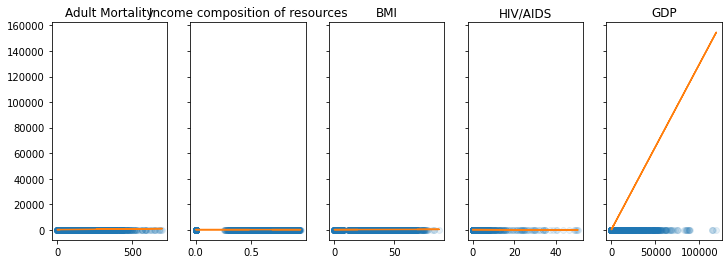

In [25]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

## 6. Evaluación cualitativa

### 6.1 Coeficientes obtenidos

In [26]:
pipeline['model'].coef_

array([ 1.15638622, -0.97641016,  2.54996372, -4.37882388,  1.29766959])

In [27]:
#En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,Adult Mortality,1.156386
1,Income composition of resources,-0.976410
2,BMI,2.549964
3,HIV/AIDS,-4.378824
4,GDP,1.297670


### 6.2 Métricas de un Modelo

#### Coeficiente de Determinación $R^2$

La primera métrica que tenemos es el coeficiente de determinación ($R^2$). Este valor indica que porcentaje de la varianza en la variable objetivo se puede explicar con las variables observadas.

In [28]:
pipeline.score(X,y)

0.6092386626746064

#### Root-Mean-Square Error (RMSE) 
La segunda medida es la raiz del error cuadrático medio.

In [29]:
y_true = y
y_predicted = pipeline.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

6.46975343100325

### 6.3 Supuestos de la regresión lineal

#### Colinealidad
Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad. La forma mas sencilla de hacer esto es con la matriz de correlación.

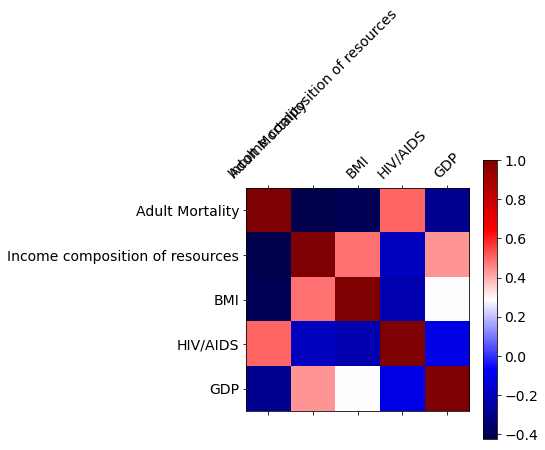

In [30]:
df_temp = df_clinica[selected_cols]

f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

#### Linealidad
Es necesario que la relación entre cada variable explicativa y la varable objetivo sea lineal. Muchas veces la mejor forma de ahcer esto es visualmente:

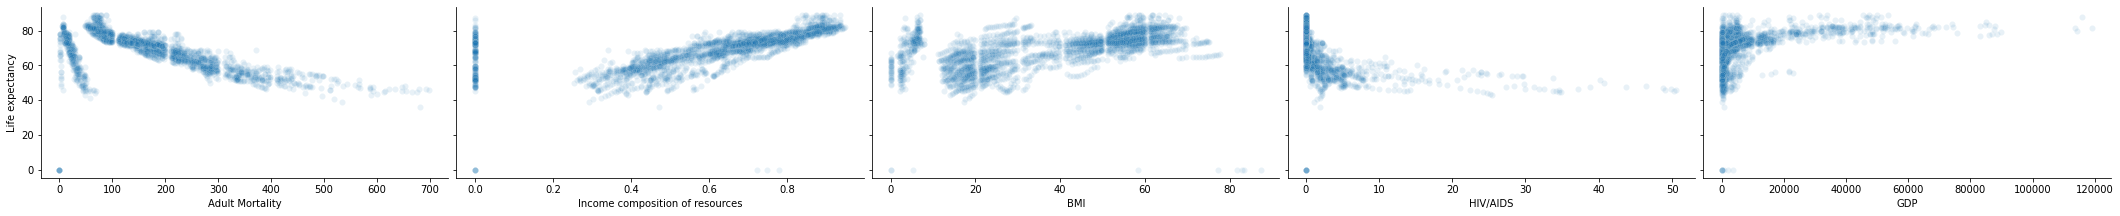

In [31]:
sns.pairplot(df_clinica, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

#### Normalidad en los Errores

Otra suposición de la regresión lineal es que los errores tienen una distribución normal. Para esto se puede usar:
* Grafico de dispersión entre los errores y el valor predicto
* Grafico Q-Q

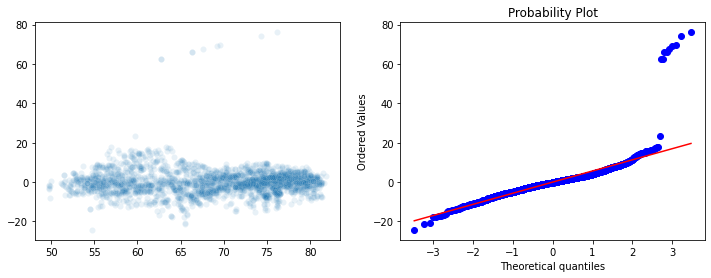

In [32]:
X = df_clinica.drop('Life expectancy', axis = 1)
y = df_clinica['Life expectancy']

# Calculamos los errores
errors = (pipeline.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

#### Varianza Constante (Homocedasticidad)

Esta suposición exige que la varianza en los errores se mantenga constante a medida que varia la variable objetivo. Al igual que otras suposiciones anteriores, la mejor forma de identificar esto es visualmente, graficando la variable objetivo contra los errores. 

<AxesSubplot:xlabel='Life expectancy'>

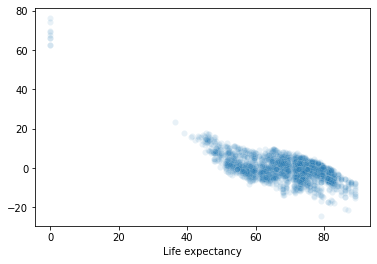

In [33]:
# Visualizamos nuestros datos
sns.scatterplot(data  = df_clinica, x = 'Life expectancy', y = errors, alpha = 0.1)

## 7. Exportar e Importar el modelo

In [34]:
#Usamos la lbreria joblib
filename = 'modelo.joblib'

#Se guarda
dump(pipeline, filename) 

['modelo.joblib']

## 8. Codigo del cliente

In [35]:
# Proceso de prubea del cliente
filename = 'modelo.joblib' # Ubicación del archivo entregado
#df_recent = pd.read_csv('datos_recientes.csv') # Lectura de los datos recientes
df_recent = pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv') # Lectura de los datos recientes

# Lee el archivo y carga el modelo
pipeline = load(filename)

#y_true = pd.read_csv('Recientes_Validacion.csv') # La columna que solo el cliente tiene
y_true = pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv') 
y_True = y_true['Life expectancy']
y_predicted =  pipeline.predict(df_recent)

# Calcula el desempeño del modelo
np.sqrt(mse(y_True, y_predicted))

6.46975343100325